In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Import the different environments from bandit.py
from bandit import Bandits_one

# Import the different MAB algorithms from mab.py
from mab import EpsilonGreedy, UCB

# Part 2 - Report

### Exercise 8

In [13]:
# Instantiate the training environment
env = Bandits_one()

# The number of experiments, and how many episodes per experiment we run
experiments = 20
episodes = 1000

# Store mean cumulative rewards per episode for each algorithm
mean_cumulative_rewards = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

# Store mean cumulative regrets per episode for each algorithm
mean_cumulative_regrets = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

First we run the Epsilon-greedy MAB algorithm on the environment for 1000 episodes, 20 times.

In [14]:
# Epsilon-greedy model
print("Training Epsilon-greedy model for", episodes, "episodes over", experiments, "experiments")
for _ in range(experiments):
    agent = EpsilonGreedy()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets["epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards["epsilon-greedy"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards["epsilon-greedy"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets["epsilon-greedy"][-1])

Training Epsilon-greedy model for 1000 episodes over 20 experiments


Mean cumulative reward: 2701.65
Mean cumulative regret: 298.35


Then we run decaying Epsilon-greedy model the same number of times.

In [15]:
# Decaying epsilon-greedy model
print("Training Decaying epsilon-greedy model for", episodes, "episodes over", experiments, "experiments")
for _ in range(experiments):
    agent = EpsilonGreedy(alpha=0.99)
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets["decaying epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards["decaying epsilon-greedy"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards["decaying epsilon-greedy"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets["decaying epsilon-greedy"][-1])

Training Decaying epsilon-greedy model for 1000 episodes over 20 experiments
Mean cumulative reward: 2965.73
Mean cumulative regret: 34.27


Finally run the UCB model the same number of times.

In [16]:
# UCB model
print("Training UCB model for", episodes, "episodes over", experiments, "experiments")
for _ in range(experiments):
    agent = UCB()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        # Get the most optimal action (according to our agent)
        action = agent.sample(episode)
        observation, reward, terminated, truncated, info = env.step(action)

        # Update the agent according to the reward
        agent.update(action, reward)

        # Store reward/regret values for later use
        cumulative_reward += reward
        mean_cumulative_regrets["ucb"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments
        mean_cumulative_rewards["ucb"][episode-1] += cumulative_reward / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

print("Mean cumulative reward: %.2f" %mean_cumulative_rewards["ucb"][-1])
print("Mean cumulative regret: %.2f" %mean_cumulative_regrets["ucb"][-1])

Training UCB model for 1000 episodes over 20 experiments
Mean cumulative reward: 2975.81
Mean cumulative regret: 24.19


Plot the different models' cumulative regret.

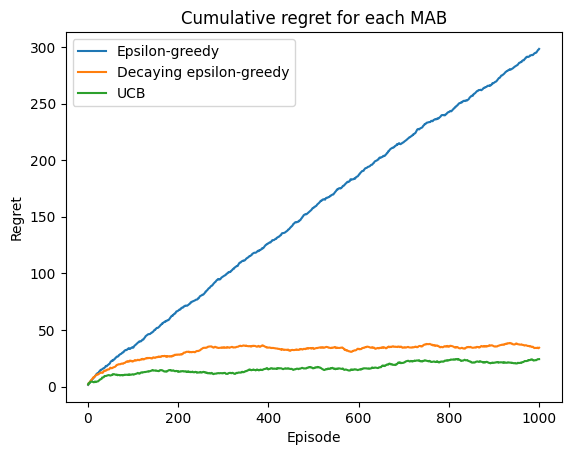

In [17]:
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets["epsilon-greedy"], label="Epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets["decaying epsilon-greedy"], label="Decaying epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regrets["ucb"], label="UCB")

plt.title("Cumulative regret for each MAB")
plt.ylabel("Regret")
plt.xlabel("Episode")

plt.legend()
plt.show()

------------------------------------------
### 4. (*)

Yes, this does match the asymptotic behaviour presented in class.

We can see that the normal Epsilon-greedy model (blue) has linear regret, whilst both the Decaying epsilon-greedy model (orange) and the UCB model (green) have logarithmic asymptotic regret.

This is easily explained by their exploration behaviour, as the normal Epsilon-greedy model continues exploring at the same rate all the time, regardless of how many episodes it has been running for. The Decaying epsilon-greedy model and the UCB model both gradually stop exploring the more sure they are that they've correctly sampled the expected reward of each action.

------------------------------------------

We can train each model several times with different hyperparameter values to observe how the regret of each algorithm changes.

In [18]:
# Train several versions of Epsilon-greedy with differing epsilon values
epsilons = [1, 0.5, 0.1, 0.05, 0]

epsilon_tuned_mean_cumulative_regrets = {}
for epsilon in epsilons:
    epsilon_tuned_mean_cumulative_regrets[epsilon] = [0] * episodes
    for _ in range(experiments):
        agent = EpsilonGreedy(epsilon=epsilon)
        observation, reward, terminated, truncated, info = env.reset()

        cumulative_reward = 0
        for episode in range(1, episodes+1):
            action = agent.sample()
            observation, reward, terminated, truncated, info = env.step(action)

            agent.update(action, reward)

            cumulative_reward += reward
            epsilon_tuned_mean_cumulative_regrets[epsilon][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

            if terminated or truncated:
                observation, reward, terminated, truncated, info = env.reset()

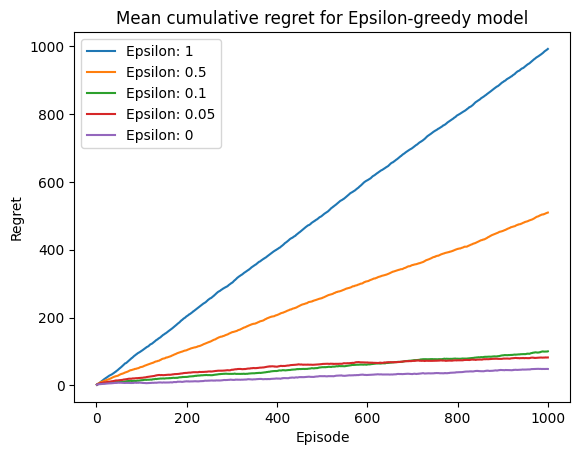

In [19]:
# Plot the different cumulative regret values for each respective epsilon value
for epsilon, regrets in epsilon_tuned_mean_cumulative_regrets.items():
    plt.plot(np.arange(1, episodes+1), regrets, label="Epsilon: " + str(epsilon))

plt.title("Mean cumulative regret for Epsilon-greedy model")
plt.xlabel("Episode")
plt.ylabel("Regret")

plt.legend()
plt.show()

It is obvious that the epsilon value has a great influence in how well the model performs!

This obviously makes sense, as a higher epsilon would mean a bigger focus on exploration rather than exploitation.

In [20]:
# Train several versions of Decaying epsilon-greedy with differing alpha values
alphas = [1, 0.5, 0.1, 0.05, 0]

alpha_tuned_mean_cumulative_regrets = {}
for alpha in alphas:
    alpha_tuned_mean_cumulative_regrets[alpha] = [0] * episodes
    for _ in range(experiments):
        agent = EpsilonGreedy(alpha=alpha)
        observation, reward, terminated, truncated, info = env.reset()

        cumulative_reward = 0
        for episode in range(1, episodes+1):
            action = agent.sample()
            observation, reward, terminated, truncated, info = env.step(action)

            agent.update(action, reward)

            cumulative_reward += reward
            alpha_tuned_mean_cumulative_regrets[alpha][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

            if terminated or truncated:
                observation, reward, terminated, truncated, info = env.reset()

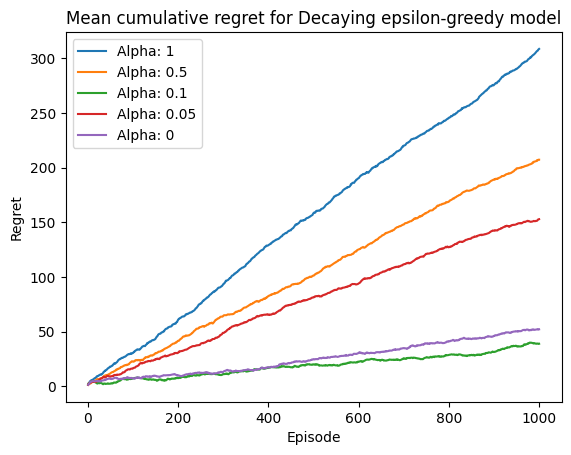

In [21]:
# Plot the different cumulative regret values for each respective alpha value
for alpha, regrets in alpha_tuned_mean_cumulative_regrets.items():
    plt.plot(np.arange(1, episodes+1), regrets, label="Alpha: " + str(alpha))

plt.title("Mean cumulative regret for Decaying epsilon-greedy model")
plt.xlabel("Episode")
plt.ylabel("Regret")

plt.legend()
plt.show()

In the same way that epsilon had a great influence in how the model performs, so does the alpha value!

This is because the alpha value governs how much exploration per episode should taper off. If alpha is high, then we should continue exploring at a higher relative rate than if alpha is low. If alpha is 1 we continue exploring just as much as the normal Greedy-epsilon does, whilst alpha of 0 would stop exploring after 1 (!) episode.

In [22]:
# Train several versions of UCB with differing c values
constants = [0, 1, 2, 5, 10, 100]

constant_tuned_mean_cumulative_regrets = {}
for constant in constants:
    constant_tuned_mean_cumulative_regrets[constant] = [0] * episodes
    for _ in range(experiments):
        agent = UCB(constant=constant)
        observation, reward, terminated, truncated, info = env.reset()

        cumulative_reward = 0
        for episode in range(1, episodes+1):
            action = agent.sample(episode)
            observation, reward, terminated, truncated, info = env.step(action)

            agent.update(action, reward)

            cumulative_reward += reward
            constant_tuned_mean_cumulative_regrets[constant][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

            if terminated or truncated:
                observation, reward, terminated, truncated, info = env.reset()

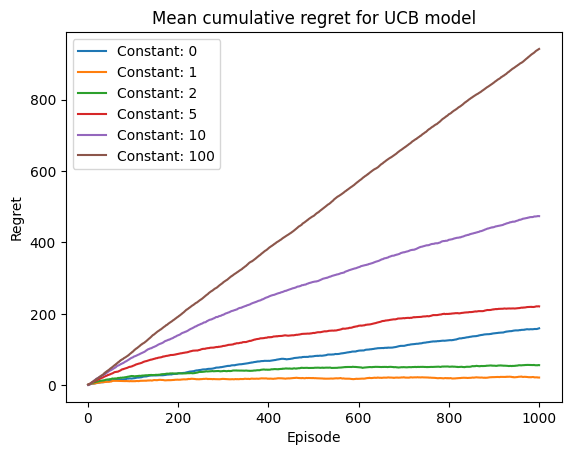

In [23]:
# Plot the different cumulative regret values for each respective constant value
for constant, regrets in constant_tuned_mean_cumulative_regrets.items():
    plt.plot(np.arange(1, episodes+1), regrets, label="Constant: " + str(constant))

plt.title("Mean cumulative regret for UCB model")
plt.xlabel("Episode")
plt.ylabel("Regret")

plt.legend()
plt.show()

Again, tuning the constant hyperparameter has a significant influence in how well the model does.

This hyperparameter controls how much a the given model should explore actions it is "unsure" about. The higher the constant, the more importance it gives these "unsure" actions. However, finding a balance is key (as a constant=1 performs much better than both constant=0 and constant=100).